<a href="https://colab.research.google.com/github/drshahizan/BDM/blob/main/Feature_Engineering_using_Featuretools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering using Featuretools

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [11]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"


In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [14]:
!kaggle datasets download -d elemento/nyc-yellow-taxi-trip-data

 99% 1.77G/1.78G [00:09<00:00, 253MB/s]
100% 1.78G/1.78G [00:10<00:00, 191MB/s]


In [15]:
!unzip \*.zip  && rm *.zip

Archive:  nyc-yellow-taxi-trip-data.zip
  inflating: yellow_tripdata_2015-01.csv  
  inflating: yellow_tripdata_2016-01.csv  
  inflating: yellow_tripdata_2016-02.csv  
  inflating: yellow_tripdata_2016-03.csv  


In [16]:
!ls

drive	sample_data		     yellow_tripdata_2016-01.csv  yellow_tripdata_2016-03.csv
gdrive	yellow_tripdata_2015-01.csv  yellow_tripdata_2016-02.csv


In [32]:
!pip install featuretools
import featuretools as ft
import numpy as np
import pandas as pd


In [37]:
df = pd.read_csv('/content/yellow_tripdata_2015-01.csv')


In [38]:
!pip install matplotlib seaborn


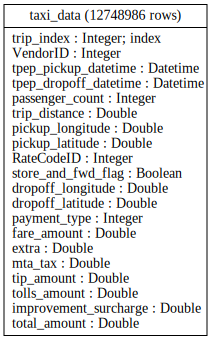

In [39]:
es = ft.EntitySet(id="trips")

es = es.add_dataframe(
    dataframe_name="taxi_data",
    dataframe=df,
    index="trip_index",
    make_index=True
)

es.plot()


In [40]:
es = ft.EntitySet(id="trips")


In [41]:
es = es.add_dataframe(
    dataframe_name="taxi_data",
    dataframe=df,
    index="trip_index",
    make_index=True,
    time_index="tpep_pickup_datetime"
)


/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index, make_index
  warnings.warn(


In [42]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="taxi_data",
    verbose=True,
    max_depth=2
)


/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Built 25 features
Elapsed: 04:22 | Progress: 100%|██████████


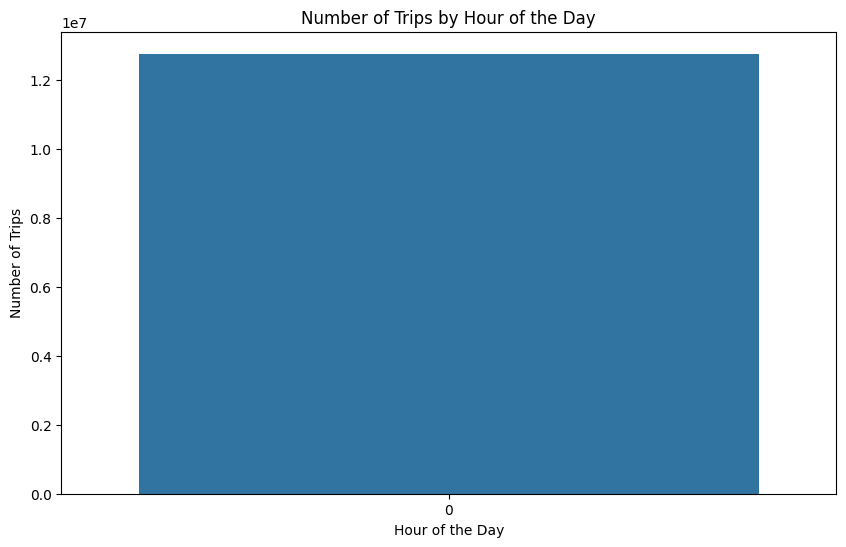

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the hour of the day from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a count plot of trips by hour of the day
sns.countplot(df['pickup_hour'])

# Set the title and labels of the plot
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')

# Display the plot
plt.show()


In [44]:
# Example: Calculate the average distance by number of passengers
avg_distance_by_passenger = df.groupby('passenger_count')['trip_distance'].mean()
print(avg_distance_by_passenger)


passenger_count
0     2.162647
1    14.826122
2    18.040789
3     2.852763
4     2.871686
5     2.856184
6     2.788518
7     2.566667
8     2.179000
9     7.269091
Name: trip_distance, dtype: float64


In [45]:
feature_matrix.to_csv('/content/feature_matrix.csv')
